In [1]:
!pip install scikit-learn
!pip install --upgrade pixiedust
!pip install brunel
!pip install graphviz
!pip install pydotplus

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 197 kB 15.2 MB/s eta 0:00:01
  Created wheel for pixiedust: 

  Created wheel for brunel: filename=brunel-2.6.2-py3-none-any.whl size=2161246 sha256=bfe1e7f1d5bcceab9bfaa7960c2514499c12d2115869af42c11aef974dd11184
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/5b/76/52/7910d0d24e582cc63e46b024289b84cdedf5e1919879ca136e
Successfully built brunel
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/

In [2]:
import seaborn as sns
import os, types
import pandas as pd
import ibm_boto3
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.tools
import pixiedust
import brunel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
from botocore.client import Config


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_8dc0b4f27fd947599977284c060ed8d5 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_8dc0b4f27fd947599977284c060ed8d5 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_8dc0b4f27fd947599977284c060ed8d5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OvtsJES-yTCY3sbM2Y4syT-yxiVsC8Cfh7nvRdez_9NA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_8dc0b4f27fd947599977284c060ed8d5)

body = client_8dc0b4f27fd947599977284c060ed8d5.get_object(Bucket='ibmhranalyticsemployeeattritionam-donotdelete-pr-ioly5lvowxozio',Key='WA_Fn-UseC_-HR-Employee-Attrition.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince


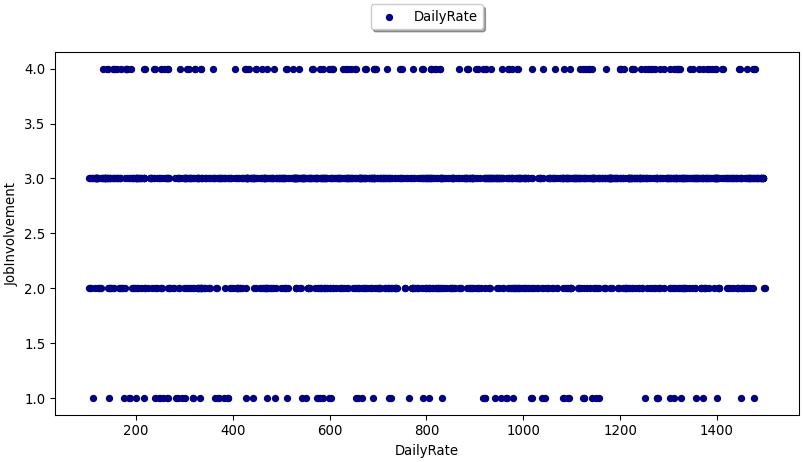

In [7]:
# Job involvent of employees on the basis of daiy rate
display(df)


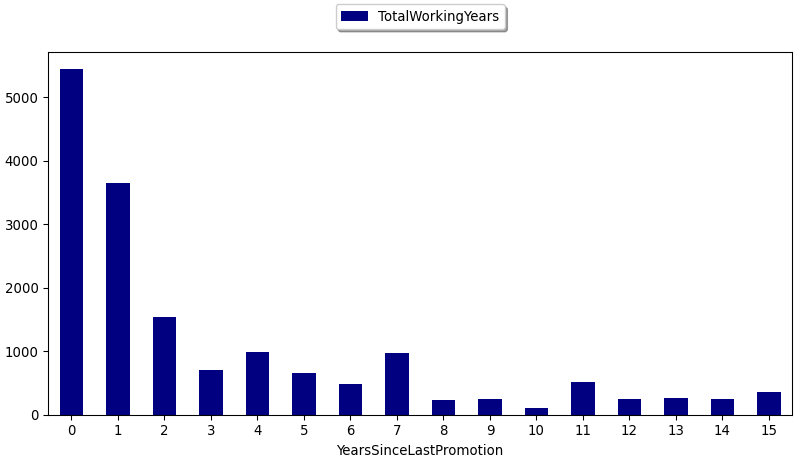

In [8]:
# Total working years vs years scince last promotion
display(df)

In [9]:
# Attrition of employees on the basis of Gender
fig = px.histogram(x=df['Gender'], color=df['Attrition'], barmode='group', color_discrete_sequence=['skyblue','blue'], height=500, width=700, title='Gender VS Attrition')
fig.show()

In [10]:
fig = px.pie(values=df['Education'].value_counts(), names=df['Education'].value_counts().index, title='Education Level')
fig.update_traces(marker=dict(colors=['darkblue','blue','skyblue','royalblue','white'],line=dict(color='chocolate',width=2)))
fig.show()

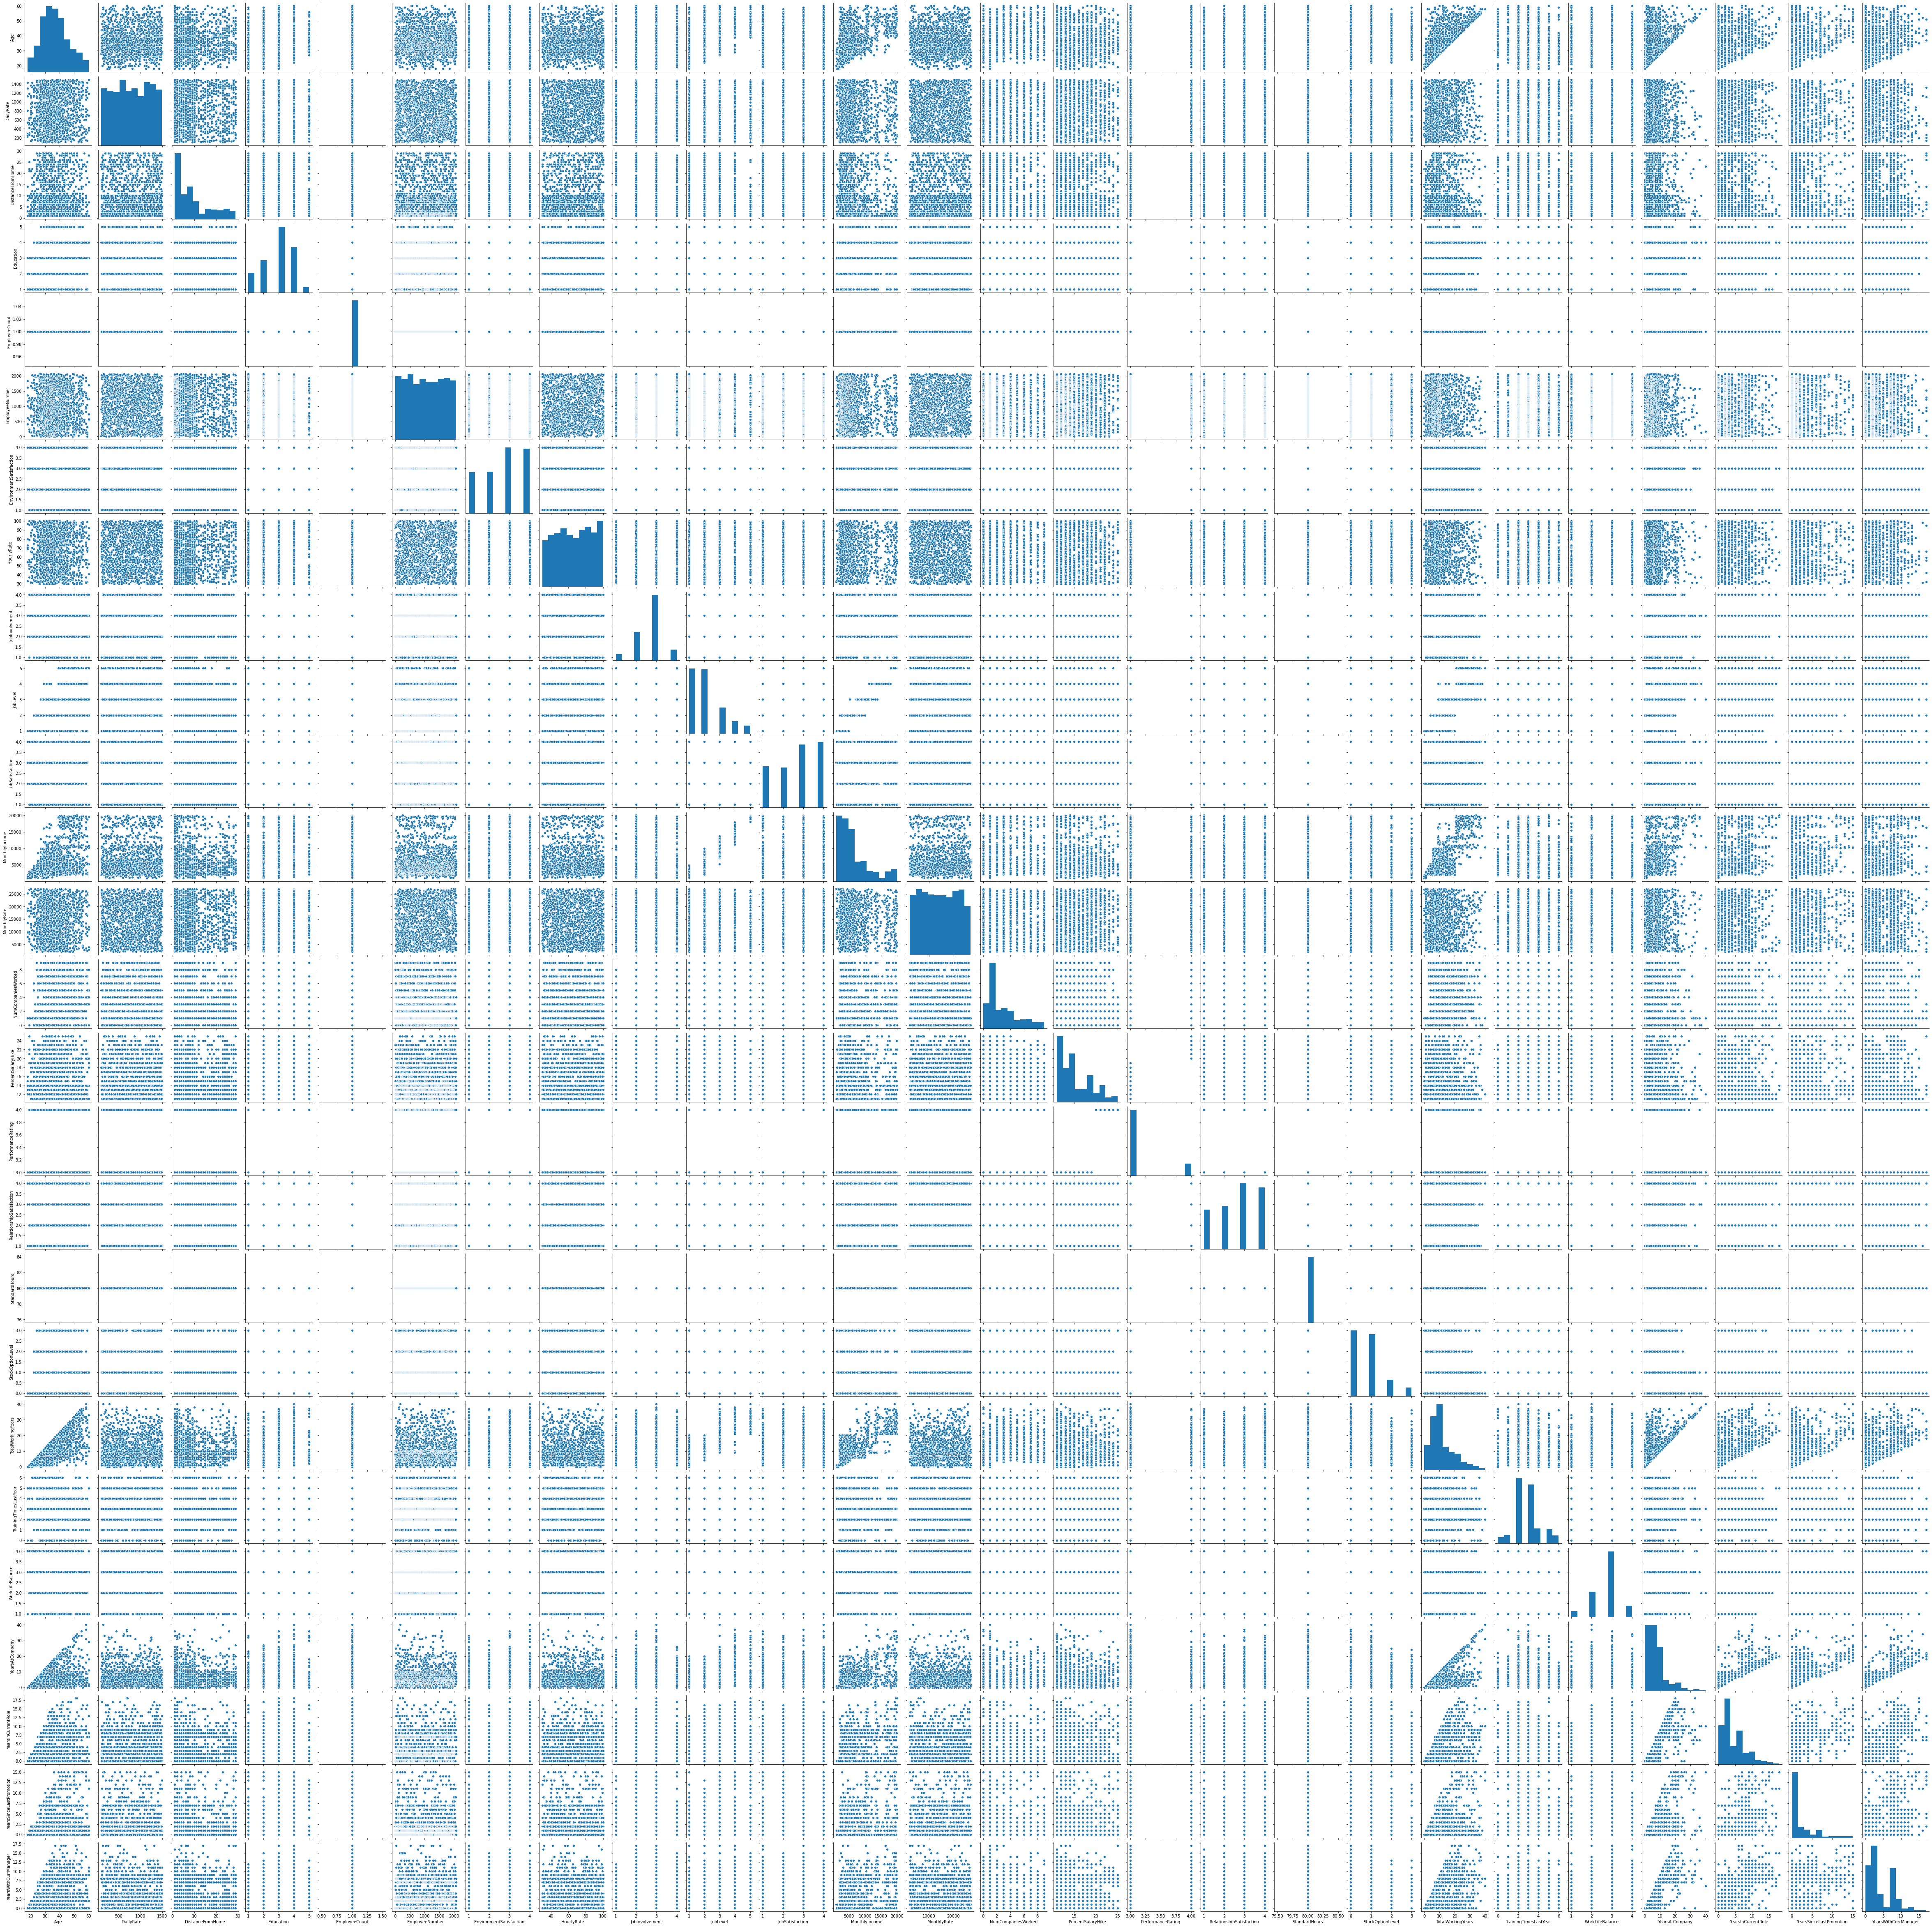

In [11]:
# Pair plot to visualise the attributes all at once
sns.pairplot(data=df)

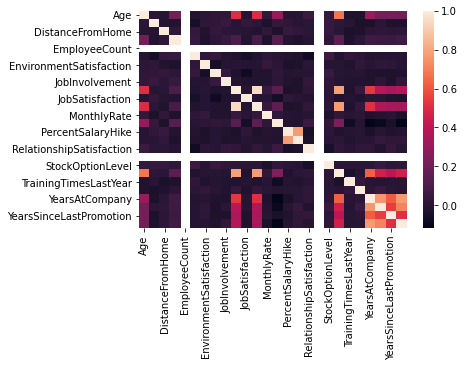

In [12]:
# correlation matrix
sns.heatmap(df.corr())

In [13]:
attFeatures = [] 
for i in df.columns:
    attFeatures.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

Features  Unique Number  \
0                        Age             43   
1                  Attrition              2   
2             BusinessTravel              3   
3                  DailyRate            886   
4                 Department              3   
5           DistanceFromHome             29   
6                  Education              5   
7             EducationField              6   
8              EmployeeCount              1   
9             EmployeeNumber           1470   
10   EnvironmentSatisfaction              4   
11                    Gender              2   
12                HourlyRate             71   
13            JobInvolvement              4   
14                  JobLevel              5   
15                   JobRole              9   
16           JobSatisfaction              4   
17             MaritalStatus              3   
18             MonthlyIncome           1349   
19               MonthlyRate           1427   
20        NumCompaniesWorked             10   
21                    Over18              1   
22                  OverTime              2   
23         PercentSalaryHike             15   
24         PerformanceRating              2   
25  RelationshipSatisfaction              4   
26             StandardHours              1   
27          StockOptionLevel              4   
28         TotalWorkingYears             40   
29     TrainingTimesLastYear              7   
30           WorkLifeBalance              4   
31            YearsAtCompany             37   
32        YearsInCurrentRole             19   
33   YearsSinceLastPromotion             16   
34      YearsWithCurrManager             18   

                                               Values  
0   [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...  
1                                           [Yes, No]  
2      [Travel_Rarely, Travel_Frequently, Non-Travel]  
3   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...  
4    [Sales, Research & Development, Human Resources]  
5   [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...  
6                                     [2, 1, 4, 3, 5]  
7   [Life Sciences, Other, Medical, Marketing, Tec...  
8                                                 [1]  
9   [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...  
10                                       [2, 3, 4, 1]  
11                                     [Female, Male]  
12  [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...  
13                                       [3, 2, 4, 1]  
14                                    [2, 1, 3, 4, 5]  
15  [Sales Executive, Research Scientist, Laborato...  
16                                       [4, 2, 3, 1]  
17                        [Single, Married, Divorced]  
18  [5993, 5130, 2090, 2909, 3468, 3068, 2670, 269...  
19  [19479, 24907, 2396, 23159, 16632, 11864, 9964...  
20                     [8, 1, 6, 9, 0, 4, 5, 2, 7, 3]  
21                                                [Y]  
22                                          [Yes, No]  
23  [11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 1...  
24                                             [3, 4]  
25                                       [1, 4, 2, 3]  
26                                               [80]  
27                                       [0, 1, 3, 2]  
28  [8, 10, 7, 6, 12, 1, 17, 5, 3, 31, 13, 0, 26, ...  
29                              [0, 3, 2, 5, 1, 4, 6]  
30                                       [1, 3, 2, 4]  
31  [6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14,...  
32  [4, 7, 0, 2, 5, 9, 8, 3, 6, 13, 1, 15, 14, 16,...  
33  [0, 1, 3, 2, 7, 4, 8, 6, 5, 15, 9, 13, 12, 10,...  
34  [5, 7, 0, 2, 6, 8, 3, 11, 17, 1, 4, 12, 9, 10,...

In [14]:
# Converting sting 'Yes' & 'No' into '1' & '0'
df.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)


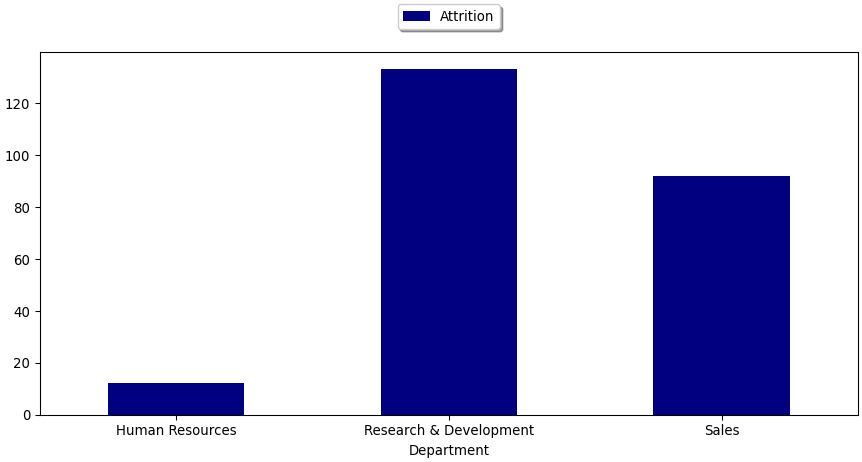

In [15]:
# attrion in each department
display(df)

In [16]:
# Deleting 'EmployeeCount', 'Over18', 'StandardHours'as they contain only one value for all rows
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.shape

(1470, 32)

In [19]:
#Indicated imbalance data 0 = Stay 1 = Resign
df['Attrition'].value_counts()/df.shape[0]*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [20]:
# Suspicious employees who can regin due to Years Since Last Promotion is more than 3years
df.loc[df["YearsSinceLastPromotion"]<4, "Suspicious_regin"]=0
df.loc[df["YearsSinceLastPromotion"]>=4, "Suspicious_regin"]=1

In [21]:
df["Suspicious_regin"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Suspicious_regin, Length: 1470, dtype: float64

In [22]:
df["Suspicious_regin"].value_counts()

0.0    1149
1.0     321
Name: Suspicious_regin, dtype: int64

In [23]:
# Employees whoes total working years is more than 25yrs and can retire
df.loc[df["TotalWorkingYears"]<25, "Edge_of_retirement"]=0
df.loc[df["TotalWorkingYears"]>=25, "Edge_of_retirement"]=1

In [24]:
df["Edge_of_retirement"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Edge_of_retirement, Length: 1470, dtype: float64

In [25]:
df["Edge_of_retirement"].value_counts()

0.0    1358
1.0     112
Name: Edge_of_retirement, dtype: int64

In [26]:
features=['Attrition', 'PerformanceRating','WorkLifeBalance', 'PercentSalaryHike', 'Suspicious_regin', 'Edge_of_retirement']

In [27]:
df_datamodel=df[features]

In [28]:
df.groupby("Attrition").mean()

Age   DailyRate  DistanceFromHome  Education  EmployeeNumber  \
Attrition                                                                       
0          37.561233  812.504461          8.915653   2.927007     1027.656123   
1          33.607595  750.362869         10.632911   2.839662     1010.345992   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
0                         2.771290   65.952149        2.770479  2.145985   
1                         2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  ...  StockOptionLevel  TotalWorkingYears  \
Attrition                   ...                                        
0                 2.778589  ...          0.845093          11.862936   
1                 2.468354  ...          0.527426           8.244726   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
0                       2.832928         2.781022        7.369019   
1                       2.624473         2.658228        5.130802   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition                                                                      
0                    4.484185                 2.234388              4.367397   
1                    2.902954                 1.945148              2.852321   

           Suspicious_regin  Edge_of_retirement  
Attrition                                        
0                  0.226277            0.084347  
1                  0.177215            0.033755  

[2 rows x 26 columns]

In [29]:
#Spliting of data into x & y variable
VAR_X=df_datamodel[['PerformanceRating','WorkLifeBalance', 'PercentSalaryHike', 'Suspicious_regin', 'Edge_of_retirement']]
VAR_Y=df_datamodel['Attrition']

In [30]:
VAR_X.head()

PerformanceRating  WorkLifeBalance  PercentSalaryHike  Suspicious_regin  \
0                  3                1                 11               0.0   
1                  4                3                 23               0.0   
2                  3                3                 15               0.0   
3                  3                3                 11               0.0   
4                  3                3                 12               0.0   

   Edge_of_retirement  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [31]:
#Split into test & train dataset
x_train, x_test, y_train, y_test,= train_test_split(VAR_X,VAR_Y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1176, 5) (1176,)
(294, 5) (294,)


In [32]:
#Training of model
output_model=RandomForestClassifier(n_jobs=2,random_state=0)
output_model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [33]:
predict_model=output_model.predict(x_test)
pd.crosstab(y_test,predict_model,rownames=['ACTUAL_RESULT'],colnames=['PREDIT_RESULT'])

PREDIT_RESULT    0
ACTUAL_RESULT     
0              249
1               45

In [34]:
#Decission Tree Classification
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict(x_test)
print(y_test,y_pred)

207     0
930     0
520     0
337     0
310     0
       ..
1440    0
64      0
344     0
673     0
312     0
Name: Attrition, Length: 294, dtype: int64 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'Accuracy Score: 0.8435374149659864')

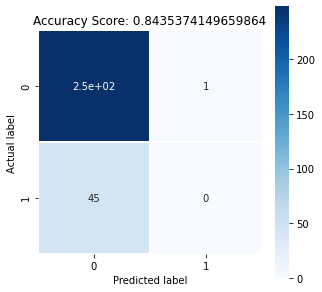

In [36]:
#Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues') 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dt.score(x_test, y_test))
plt.title(all_sample_title, size = 12)

In [37]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8435374149659864


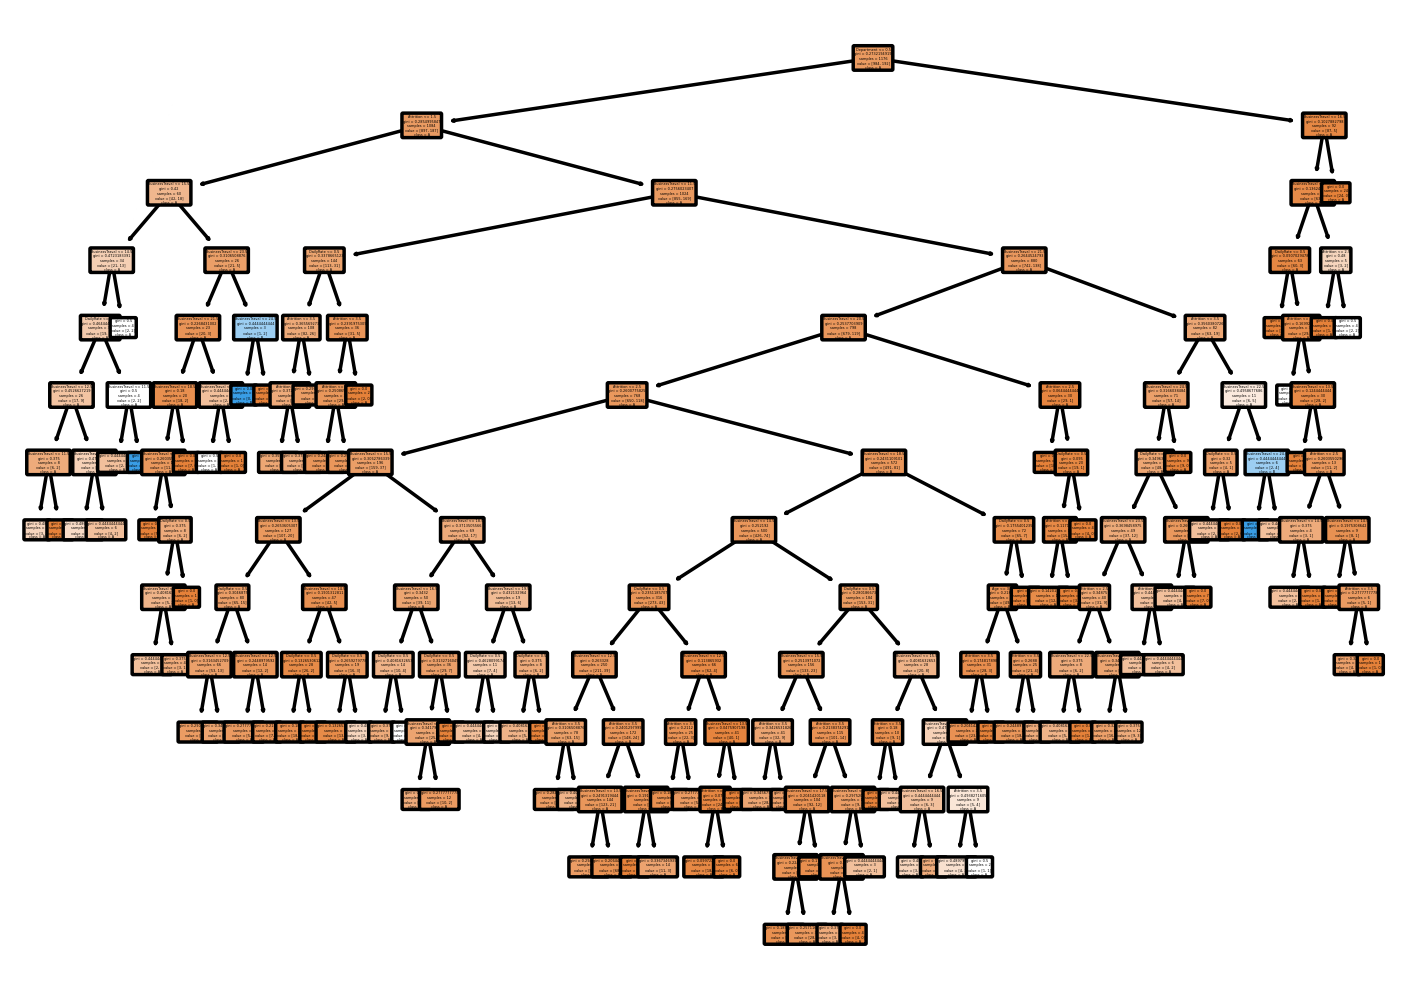

In [38]:
#Visualizing Decision Trees
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,5), dpi=250)
dec_tree = plot_tree(decision_tree=dt, feature_names = df.columns, 
                     class_names =["A", "B", "C"] , filled = True , precision = 10, rounded = True)

In [39]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [40]:
# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)

In [41]:
#Predict the response for test dataset
y_pred = dt.predict(x_test)
print(y_test,y_pred)

207     0
930     0
520     0
337     0
310     0
       ..
1440    0
64      0
344     0
673     0
312     0
Name: Attrition, Length: 294, dtype: int64 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'Accuracy Score: 0.8469387755102041')

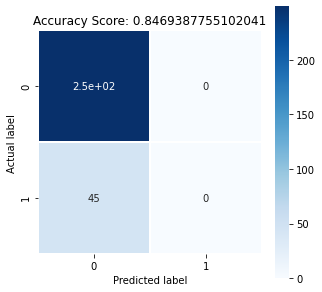

In [42]:
#Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues') 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dt.score(x_test, y_test))
plt.title(all_sample_title, size = 12)

In [43]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8469387755102041


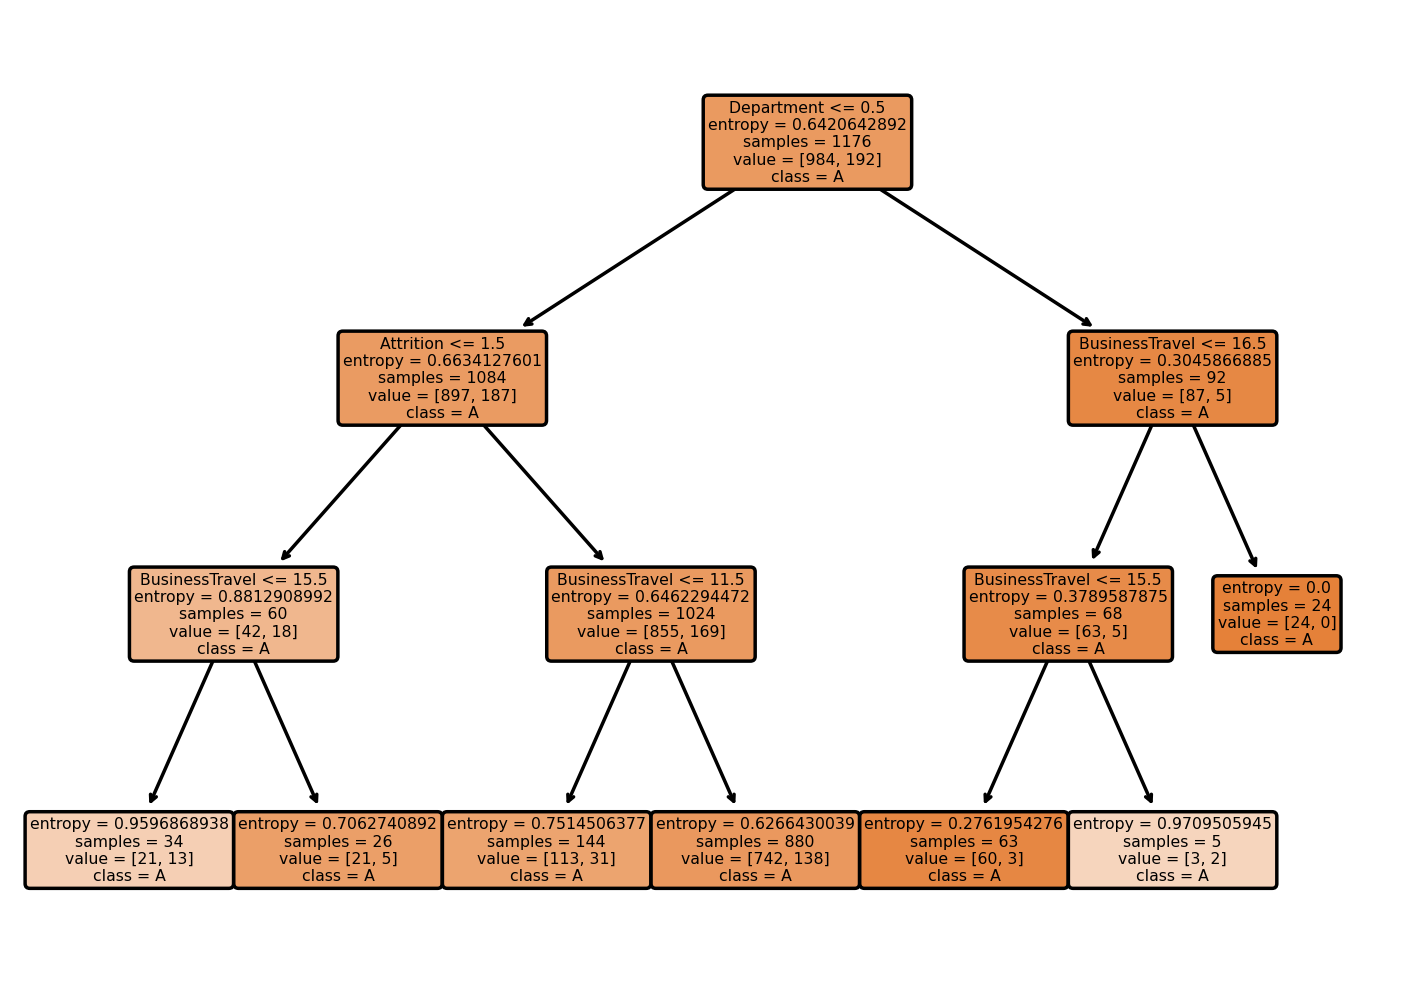

In [44]:
#Visualizing Decision Trees
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,5), dpi=250)
dec_tree = plot_tree(decision_tree=dt, feature_names = df.columns, 
                     class_names =["A", "B", "C"] , filled = True , precision = 10, rounded = True)